In [1]:
import os, sys
sys.path.append("code/")

import torch
from training import create_checkpoint_filename
from check_model import read_model, get_test_dataset
import numpy as np

from matplotlib import pyplot as plt


from numpy import linalg as LA

torch.set_num_threads(40)


INFO:numexpr.utils:Note: detected 80 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 80 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
DEBUG:matplotlib:matplotlib data path: /scratch2/BMC/gsienkf/Sergey.Frolov/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/Sergey.Frolov/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'posix', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', 'encodings.latin_1', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', '_distutils_hack'

DEBUG:matplotlib:CACHEDIR=/home/Sergey.Frolov/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/Sergey.Frolov/.cache/matplotlib/fontlist-v330.json


In [2]:
fntmp='checks/conv2d_tpsuvq_online_t_4_1_4096_3_0.25_8_mse_0.0001_1e-05_sub_98_14_0.7'

checkfile = torch.load(fntmp,map_location=torch.device('cpu'))
coeff = list(checkfile['model_state_dict'].items())

In [3]:
LA.norm(coeff[2][1].cpu().detach().numpy())

56.135414

In [12]:
plt.imshow(np.squeeze(coeff[0][1].cpu().detach().numpy())[0:100,0:100])
plt.colorbar()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

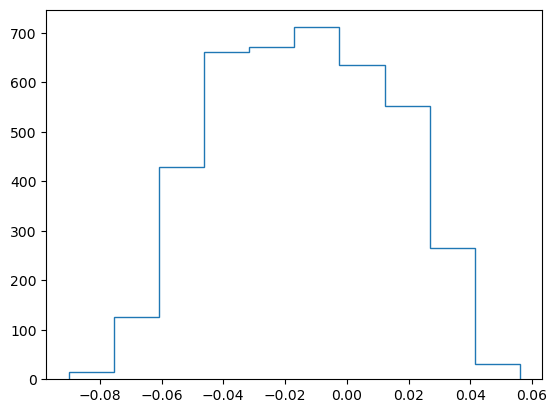

In [13]:
w=coeff[1][1].cpu().detach().numpy()
counts, bins = np.histogram(w.flatten())
plt.stairs(counts, bins)
